# Preprocess Gossip Dataset
 

Complete dataset cannot be distributed because of Twitter privacy policies and news publisher copy rights. Social engagements and user information are not disclosed because of Twitter Policy. This code repository can be used to download news articles from published websites and relevant social media data from Twitter.

The minimalistic version of latest dataset provided in this repo (located in dataset folder) include following files:

gossipcop_fake.csv - Samples related to fake news collected from GossipCop
gossipcop_real.csv - Samples related to real news collected from GossipCop
Each of the above CSV files is comma separated file and have the following columns

- id : Unique identifider for each news
- url : Url of the article from web that published that news
- title : Title of the news article
- tweet_ids : Tweet ids of tweets sharing the news. This field is list of tweet ids separated by tab.

## Importing packages 

In [19]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

from collections import defaultdict, Counter
import string
from sklearn.feature_extraction.text import CountVectorizer

import os.path as op
import glob
%matplotlib inline

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
DATA_DIR = '../../Data'

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Trainig Data :

In [21]:
# load test
train1 = pd.read_csv(op.join(DATA_DIR, 'Gossip/Unprocessed_data/gossipcop_real.csv'))
train1

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                                           news_url  \
0      gossipcop-882573  https://www.brides.com/story/teen-mom-jenelle-...   
1      gossipcop-875924  https://www.dailymail.co.uk/tvshowbiz/article-...   
2      gossipcop-894416        https://en.wikipedia.org/wiki/Quinn_Perkins   
3      gossipcop-857248  https://www.refinery29.com/en-us/2018/03/19192...   
4      gossipcop-884684  https://www.cnn.com/2017/10/04/entertainment/c...   
...                 ...                                                ...   
16812  gossipcop-891749  https://omgcheckitout.com/2017-hollywood-film-...   
16813  gossipcop-941486  https://pagesix.com/2018/06/04/jada-pinkett-sm...   
16814  gossipcop-953143  https://www.etonline.com/tinsley-mortimer-reac...   
16815  gossipcop-954366  https://www.healthbreakingnews.net/2018/07/pri...   
16816  gossipcop-877062  https://www.cosmopolitan.com/uk/entertainment/...   

                                                   title  \
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...   
1      Kylie Jenner refusing to discuss Tyga on Life ...   
2                                          Quinn Perkins   
3      I Tried Kim Kardashian's Butt Workout & Am For...   
4      Celine Dion donates concert proceeds to Vegas ...   
...                                                  ...   
16812  2017 Hollywood Film Awards: The Complete List ...   
16813  Jada Pinkett Smith explains why son Jaden move...   
16814  Tinsley Mortimer Reacts to Luann de Lesseps' R...   
16815  Prince Harry Carries on Princess Diana’s Legac...   
16816  Kylie Jenner is actually terrified of butterflies   

                                               tweet_ids  
0      912371411146149888\t912371528343408641\t912372...  
1      901989917546426369\t901989992074969089\t901990...  
2      931263637246881792\t931265332022579201\t931265...  
3      868114761723936769\t868122567910936576\t868128...  
4      915528047004209152\t915529285171122176\t915530...  
...                                                  ...  
16812  927385466357260288\t927386601034010625\t927387...  
16813  1004044947006386178\t1004045964401889285\t1004...  
16814  1019924845889572864\t1019925702676709377\t1019...  
16815  1021766291139584000\t1021772054599802880\t1021...  
16816                                                NaN  

[16817 rows x 4 columns]

In [22]:
train1['label']=0

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
train1

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                                           news_url  \
0      gossipcop-882573  https://www.brides.com/story/teen-mom-jenelle-...   
1      gossipcop-875924  https://www.dailymail.co.uk/tvshowbiz/article-...   
2      gossipcop-894416        https://en.wikipedia.org/wiki/Quinn_Perkins   
3      gossipcop-857248  https://www.refinery29.com/en-us/2018/03/19192...   
4      gossipcop-884684  https://www.cnn.com/2017/10/04/entertainment/c...   
...                 ...                                                ...   
16812  gossipcop-891749  https://omgcheckitout.com/2017-hollywood-film-...   
16813  gossipcop-941486  https://pagesix.com/2018/06/04/jada-pinkett-sm...   
16814  gossipcop-953143  https://www.etonline.com/tinsley-mortimer-reac...   
16815  gossipcop-954366  https://www.healthbreakingnews.net/2018/07/pri...   
16816  gossipcop-877062  https://www.cosmopolitan.com/uk/entertainment/...   

                                                   title  \
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...   
1      Kylie Jenner refusing to discuss Tyga on Life ...   
2                                          Quinn Perkins   
3      I Tried Kim Kardashian's Butt Workout & Am For...   
4      Celine Dion donates concert proceeds to Vegas ...   
...                                                  ...   
16812  2017 Hollywood Film Awards: The Complete List ...   
16813  Jada Pinkett Smith explains why son Jaden move...   
16814  Tinsley Mortimer Reacts to Luann de Lesseps' R...   
16815  Prince Harry Carries on Princess Diana’s Legac...   
16816  Kylie Jenner is actually terrified of butterflies   

                                               tweet_ids  label  
0      912371411146149888\t912371528343408641\t912372...      0  
1      901989917546426369\t901989992074969089\t901990...      0  
2      931263637246881792\t931265332022579201\t931265...      0  
3      868114761723936769\t868122567910936576\t868128...      0  
4      915528047004209152\t915529285171122176\t915530...      0  
...                                                  ...    ...  
16812  927385466357260288\t927386601034010625\t927387...      0  
16813  1004044947006386178\t1004045964401889285\t1004...      0  
16814  1019924845889572864\t1019925702676709377\t1019...      0  
16815  1021766291139584000\t1021772054599802880\t1021...      0  
16816                                                NaN      0  

[16817 rows x 5 columns]

In [24]:
# load test
train2 = pd.read_csv(op.join(DATA_DIR, 'Gossip/Unprocessed_data/gossipcop_fake.csv'))
train2

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                                           news_url  \
0     gossipcop-2493749932  www.dailymail.co.uk/tvshowbiz/article-5874213/...   
1     gossipcop-4580247171  hollywoodlife.com/2018/05/05/paris-jackson-car...   
2      gossipcop-941805037  variety.com/2017/biz/news/tax-march-donald-tru...   
3     gossipcop-2547891536  www.dailymail.co.uk/femail/article-3499192/Do-...   
4     gossipcop-5476631226  variety.com/2018/film/news/list-2018-oscar-nom...   
...                    ...                                                ...   
5318  gossipcop-6702260693  www.huffingtonpost.com/2012/09/11/september-11...   
5319  gossipcop-6051845337  www.dailymail.co.uk/news/article-4915674/NASCA...   
5320  gossipcop-2435526162  www.telegraph.co.uk/men/the-filter/7-signs-dav...   
5321  gossipcop-4576152851  www.vanityfair.com/style/2016/09/ryan-gosling-...   
5322   gossipcop-919334865  www.lifeandstylemag.com/posts/jamie-foxx-katie...   

                                                  title  \
0     Did Miley Cyrus and Liam Hemsworth secretly ge...   
1     Paris Jackson & Cara Delevingne Enjoy Night Ou...   
2     Celebrities Join Tax March in Protest of Donal...   
3     Cindy Crawford's daughter Kaia Gerber wears a ...   
4         Full List of 2018 Oscar Nominations – Variety   
...                                                 ...   
5318   September 11: Celebrities Remember 9/11 (TWEETS)   
5319  NASCAR owners threaten to fire drivers who pro...   
5320  The 7 signs that David Beckham is definitely h...   
5321  Ryan Gosling and Eva Mendes Did Not Get Marrie...   
5322  Jamie Foxx Spends the Day With Katie Holmes an...   

                                              tweet_ids  
0     284329075902926848\t284332744559968256\t284335...  
1     992895508267130880\t992897935418503169\t992899...  
2     853359353532829696\t853359576543920128\t853359...  
3     988821905196158981\t988824206556172288\t988825...  
4     955792793632432131\t955795063925301249\t955798...  
...                                                 ...  
5318                                 245643768638894080  
5319  912048333413330944\t912048571482087424\t912049...  
5320  897794716447539200\t897804460830928896\t897842...  
5321  778678901572710400\t778681718714740736\t778683...  
5322  913137595424608258\t913139996059717632\t913146...  

[5323 rows x 4 columns]

In [25]:
train2['label']=1

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Concatenate train1 and train2

In [26]:
frames = [train1, train2]
train = pd.concat(frames)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
train =train.reset_index(drop=True)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
train

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id  \
0          gossipcop-882573   
1          gossipcop-875924   
2          gossipcop-894416   
3          gossipcop-857248   
4          gossipcop-884684   
...                     ...   
22135  gossipcop-6702260693   
22136  gossipcop-6051845337   
22137  gossipcop-2435526162   
22138  gossipcop-4576152851   
22139   gossipcop-919334865   

                                                news_url  \
0      https://www.brides.com/story/teen-mom-jenelle-...   
1      https://www.dailymail.co.uk/tvshowbiz/article-...   
2            https://en.wikipedia.org/wiki/Quinn_Perkins   
3      https://www.refinery29.com/en-us/2018/03/19192...   
4      https://www.cnn.com/2017/10/04/entertainment/c...   
...                                                  ...   
22135  www.huffingtonpost.com/2012/09/11/september-11...   
22136  www.dailymail.co.uk/news/article-4915674/NASCA...   
22137  www.telegraph.co.uk/men/the-filter/7-signs-dav...   
22138  www.vanityfair.com/style/2016/09/ryan-gosling-...   
22139  www.lifeandstylemag.com/posts/jamie-foxx-katie...   

                                                   title  \
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...   
1      Kylie Jenner refusing to discuss Tyga on Life ...   
2                                          Quinn Perkins   
3      I Tried Kim Kardashian's Butt Workout & Am For...   
4      Celine Dion donates concert proceeds to Vegas ...   
...                                                  ...   
22135   September 11: Celebrities Remember 9/11 (TWEETS)   
22136  NASCAR owners threaten to fire drivers who pro...   
22137  The 7 signs that David Beckham is definitely h...   
22138  Ryan Gosling and Eva Mendes Did Not Get Marrie...   
22139  Jamie Foxx Spends the Day With Katie Holmes an...   

                                               tweet_ids  label  
0      912371411146149888\t912371528343408641\t912372...      0  
1      901989917546426369\t901989992074969089\t901990...      0  
2      931263637246881792\t931265332022579201\t931265...      0  
3      868114761723936769\t868122567910936576\t868128...      0  
4      915528047004209152\t915529285171122176\t915530...      0  
...                                                  ...    ...  
22135                                 245643768638894080      1  
22136  912048333413330944\t912048571482087424\t912049...      1  
22137  897794716447539200\t897804460830928896\t897842...      1  
22138  778678901572710400\t778681718714740736\t778683...      1  
22139  913137595424608258\t913139996059717632\t913146...      1  

[22140 rows x 5 columns]

## Get rid of the columns that we don't need

In [29]:
train=train.drop(columns=['id','tweet_ids'])

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
train

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


news_url  \
0      https://www.brides.com/story/teen-mom-jenelle-...   
1      https://www.dailymail.co.uk/tvshowbiz/article-...   
2            https://en.wikipedia.org/wiki/Quinn_Perkins   
3      https://www.refinery29.com/en-us/2018/03/19192...   
4      https://www.cnn.com/2017/10/04/entertainment/c...   
...                                                  ...   
22135  www.huffingtonpost.com/2012/09/11/september-11...   
22136  www.dailymail.co.uk/news/article-4915674/NASCA...   
22137  www.telegraph.co.uk/men/the-filter/7-signs-dav...   
22138  www.vanityfair.com/style/2016/09/ryan-gosling-...   
22139  www.lifeandstylemag.com/posts/jamie-foxx-katie...   

                                                   title  label  
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...      0  
1      Kylie Jenner refusing to discuss Tyga on Life ...      0  
2                                          Quinn Perkins      0  
3      I Tried Kim Kardashian's Butt Workout & Am For...      0  
4      Celine Dion donates concert proceeds to Vegas ...      0  
...                                                  ...    ...  
22135   September 11: Celebrities Remember 9/11 (TWEETS)      1  
22136  NASCAR owners threaten to fire drivers who pro...      1  
22137  The 7 signs that David Beckham is definitely h...      1  
22138  Ryan Gosling and Eva Mendes Did Not Get Marrie...      1  
22139  Jamie Foxx Spends the Day With Katie Holmes an...      1  

[22140 rows x 3 columns]

## Deal with the null values 

In [31]:
# Find Na 
train.isnull().sum()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


news_url    269
title         0
label         0
dtype: int64

## Dealing with duplicate values

In [32]:
train.drop_duplicates().shape, train.shape

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((20964, 3), (22140, 3))

In [33]:
train.drop_duplicates(subset=['label', 'news_url','title'], keep='first')

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


news_url  \
0      https://www.brides.com/story/teen-mom-jenelle-...   
1      https://www.dailymail.co.uk/tvshowbiz/article-...   
2            https://en.wikipedia.org/wiki/Quinn_Perkins   
3      https://www.refinery29.com/en-us/2018/03/19192...   
4      https://www.cnn.com/2017/10/04/entertainment/c...   
...                                                  ...   
22135  www.huffingtonpost.com/2012/09/11/september-11...   
22136  www.dailymail.co.uk/news/article-4915674/NASCA...   
22137  www.telegraph.co.uk/men/the-filter/7-signs-dav...   
22138  www.vanityfair.com/style/2016/09/ryan-gosling-...   
22139  www.lifeandstylemag.com/posts/jamie-foxx-katie...   

                                                   title  label  
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...      0  
1      Kylie Jenner refusing to discuss Tyga on Life ...      0  
2                                          Quinn Perkins      0  
3      I Tried Kim Kardashian's Butt Workout & Am For...      0  
4      Celine Dion donates concert proceeds to Vegas ...      0  
...                                                  ...    ...  
22135   September 11: Celebrities Remember 9/11 (TWEETS)      1  
22136  NASCAR owners threaten to fire drivers who pro...      1  
22137  The 7 signs that David Beckham is definitely h...      1  
22138  Ryan Gosling and Eva Mendes Did Not Get Marrie...      1  
22139  Jamie Foxx Spends the Day With Katie Holmes an...      1  

[20964 rows x 3 columns]

## Renaming the columns 

In [34]:
train=train.rename(columns={'news_url':'author'})

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
train

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


author  \
0      https://www.brides.com/story/teen-mom-jenelle-...   
1      https://www.dailymail.co.uk/tvshowbiz/article-...   
2            https://en.wikipedia.org/wiki/Quinn_Perkins   
3      https://www.refinery29.com/en-us/2018/03/19192...   
4      https://www.cnn.com/2017/10/04/entertainment/c...   
...                                                  ...   
22135  www.huffingtonpost.com/2012/09/11/september-11...   
22136  www.dailymail.co.uk/news/article-4915674/NASCA...   
22137  www.telegraph.co.uk/men/the-filter/7-signs-dav...   
22138  www.vanityfair.com/style/2016/09/ryan-gosling-...   
22139  www.lifeandstylemag.com/posts/jamie-foxx-katie...   

                                                   title  label  
0      Teen Mom Star Jenelle Evans' Wedding Dress Is ...      0  
1      Kylie Jenner refusing to discuss Tyga on Life ...      0  
2                                          Quinn Perkins      0  
3      I Tried Kim Kardashian's Butt Workout & Am For...      0  
4      Celine Dion donates concert proceeds to Vegas ...      0  
...                                                  ...    ...  
22135   September 11: Celebrities Remember 9/11 (TWEETS)      1  
22136  NASCAR owners threaten to fire drivers who pro...      1  
22137  The 7 signs that David Beckham is definitely h...      1  
22138  Ryan Gosling and Eva Mendes Did Not Get Marrie...      1  
22139  Jamie Foxx Spends the Day With Katie Holmes an...      1  

[22140 rows x 3 columns]

## Saving the results in files 

In [36]:
train.to_csv(op.join(DATA_DIR, 'Gossip/Claims_to_work_with/claims.csv'), index=False)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from pandas_profiling import ProfileReport

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
profile 

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
profile.to_file(op.join(DATA_DIR,"Gossip/Claims_to_work_with/Kaggle_report.html"))

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
stat=train.author.value_counts()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
stat

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://www.thewrap.com/this-is-us-everything-we-know-her-rebecca-future-randall-tess-beth-mother/                         11
https://en.wikipedia.org/wiki/Wedding_of_Prince_Harry_and_Meghan_Markle                                                     9
www.newidea.com.au/jennifer-aniston-and-brad-pitt-busted-in-aspen                                                           8
https://people.com/tv/why-nikki-bella-hid-her-first-marriage-from-john-cena-and-how-he-reacted-when-he-found-out/           8
https://en.wikipedia.org/wiki/Travis_Scott                                                                                  8
                                                                                                                           ..
https://www.today.com/popculture/ben-affleck-hollywood-sexual-harassment-i-ve-been-looking-my-t118479                       1
https://www.buzzyoo.com/emily-ratajkowskis-cannes-bikini-was-a-bold-choice/                                           

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


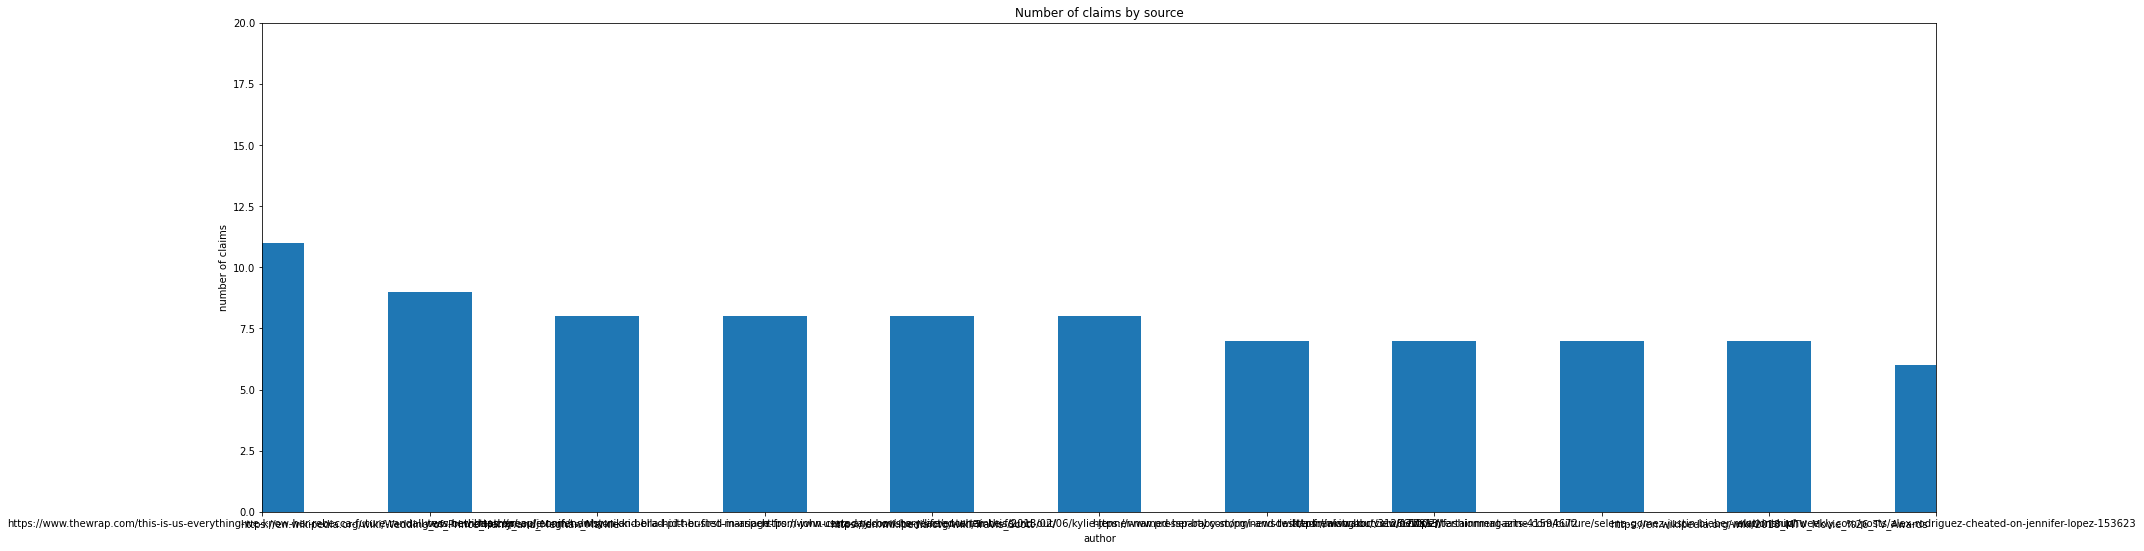

In [43]:
# Define plot space
fig, ax = plt.subplots(figsize=(30, 9))
# Define x and y axes
ax.bar(stat.index, stat.values, align='center', width=0.50)
# Set plot title and axes labels
ax.set(title = "Number of claims by source")
ax.set_xlabel("author")
ax.set_ylabel("number of claims")
ax.set_xlim(0, 10)
ax.set_ylim(0, 20)
plt.show()